In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных и первичный анализ


In [ ]:
# Загружаем фреймы
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [ ]:
# Выводим основную информацию о данных
print(movies.info(), ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB
None None


In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [ ]:
# Исследуем отзывы, пользователей и фильмы
rate_value = len(ratings)  # кол-во отзывов
uni_users = ratings.userId.nunique()  # кол-во уникальных пользователи
uni_movies = ratings.movieId.nunique()  # кол-во уникальных фильмов
global_avg_rate = ratings.rating.mean()  # глобальный средний рейтинг фильмов

# Так же посчитаем средние кол-во отзывов к пользователям и к фильмам
avg_rate_per_user = np.round(rate_value / uni_users, 2)
avg_rate_per_movie = np.round(rate_value / uni_movies, 2)

# Выводим подсчёты
print('Количество отзывов: {}.'.format(rate_value))
print('Количество уникальных пользователей: {}.'.format(uni_users))
print('Количество уникальных фильмов: {}.'.format(uni_movies))
print('Среднее кол-во отзывов к кол-ву пользователей {}.'.format(
    avg_rate_per_user
))
print('Среднее кол-во отзывов к кол-ву фильмов {}.'.format(
    avg_rate_per_movie
))

Количество отзывов: 25000095.
Количество уникальных пользователей: 162541.
Количество уникальных фильмов: 59047.
Среднее кол-во отзывов к кол-ву пользователей 153.81.
Среднее кол-во отзывов к кол-ву фильмов 423.39.


# Распределение данных

/tmp/ipython-input-15-170288479.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


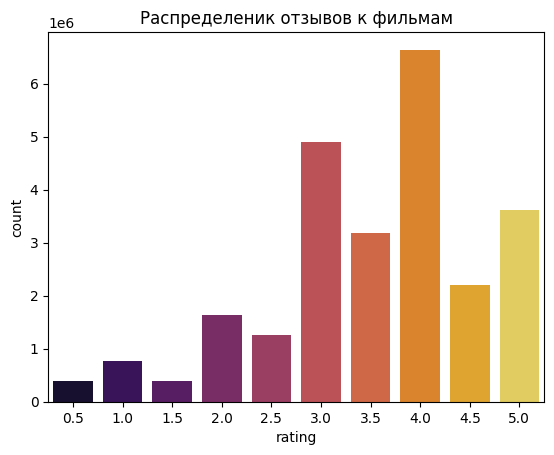

In [ ]:
sns.countplot(
    x='rating',
    data=ratings,
    palette='inferno',
)
plt.title('Распределеник отзывов к фильмам')
plt.show()

In [ ]:
# Выведем глобальный средний рейтинг
global_avg_rate = np.round(ratings.rating.mean(), 2)
print('Глобальный средний рейтинг: {}'.format(global_avg_rate))

Глобальный средний рейтинг: 3.53


In [ ]:
# Сгруппируем средние оценки по пользователям
mean_rate_users = ratings.groupby('userId')['rating'].mean()
print('Средняя оценка по пользователям: {}.'.format(
    np.round(mean_rate_users.mean(), 2)
))

Средняя оценка по пользователям: 3.68.


# Минимумы и максимумы. Частотность оценки

In [ ]:
# Смотрим, какие фильмы оцениваются наиболее часто
ratings.movieId.value_counts()  # здесь мы получили кол-во по Id

,count
movieId,
356,81491
318,81482
296,79672
593,74127
2571,72674
...,...
200182,1
200178,1
200172,1


In [ ]:
# Объединим фреймы, чтобы понять конкретно по фильмам, а не по идентификаторам
movie_ratings = ratings.merge(movies, on='movieId')
movie_ratings.head()  # получили фрейм, включающий названия

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,1,306,3.5,1147868817,Three Colors: Red (Trois couleurs: Rouge) (1994),Drama
2,1,307,5.0,1147868828,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,1,665,5.0,1147878820,Underground (1995),Comedy|Drama|War
4,1,899,3.5,1147868510,Singin' in the Rain (1952),Comedy|Musical|Romance


In [ ]:
# Выводим самые частотные фильмы по отзывам
most_frequent = movie_ratings.title.value_counts()[:10]
most_frequent

,count
title,
Forrest Gump (1994),81491
"Shawshank Redemption, The (1994)",81482
Pulp Fiction (1994),79672
"Silence of the Lambs, The (1991)",74127
"Matrix, The (1999)",72674
Star Wars: Episode IV - A New Hope (1977),68717
Jurassic Park (1993),64144
Schindler's List (1993),60411
Braveheart (1995),59184


In [ ]:
# Посмотрим на минимум и максимум по среднему рейтингу
mean_rate_movies = ratings.groupby('movieId')[['rating']].mean()

lowest_rated_idx = mean_rate_movies.rating.idxmin()
lowest_rated_movie = movies[movies.movieId == lowest_rated_idx]

highest_rated_idx = mean_rate_movies.rating.idxmax()
highest_rated_movie = movies[movies.movieId == highest_rated_idx]

Два фильма: с самым высоким и самым низким рейтингом

In [ ]:
highest_rated_movie

,movieId,title,genres
9416,27914,"Hijacking Catastrophe: 9/11, Fear & the Sellin...",Documentary


Количество отзывов по ним

In [ ]:
lowest_rated_movie

,movieId,title,genres
5693,5805,Besotted (2001),Drama


In [ ]:
ratings[ratings.movieId == highest_rated_idx]

,userId,movieId,rating,timestamp
19328266,125475,27914,5.0,1409649085


In [ ]:
ratings[ratings.movieId == lowest_rated_idx]

,userId,movieId,rating,timestamp
10857335,70460,5805,0.5,1092107651
22045429,143315,5805,0.5,1184971591


Можно заметить, что на самом высоком по оценке фильме всего 1 отзыв. На самом худшем по оценке 2 отзыва. Соответственно средняя оценка некорректная по причине малого количества данных об отзывах на эти фильмы. Что делать в такой ситуации? В этом поможет [Байесовское среднее](https://en.wikipedia.org/wiki/Bayesian_average):

$$\bar{x} = {Cm + \sum_{i=1}^n x_i \over C + n}$$

Где:

$${C}\, —\, уверенность,\, отражающая\, типичный\, размер\, выборки$$
$${m}\, —\, вес,\, отражающий\, доверие\, к\, глобальному\, среднему\, C$$
$$\sum_{i=1}^n x_i\, —\, сумма\, реальных\, показателей$$
$${n}\, —\ количество\, реальных\, наблюдений$$

По сути, это *умное среднее*, которое сглаживает данные, когда их мало, что позволяет более объективно оценить выборку.

In [ ]:
# Получим необходимые данные и напишем функцию для вычисления среднего
movies_stats = ratings.groupby('movieId')['rating'].agg(['count', 'mean'])
C = movies_stats['count'].mean()
m = movies_stats['mean'].mean()

def bayesian_avg(ratings: pd.DataFrame) -> float:
    bayesian_avg = (C * m + ratings.sum()) / (C + ratings.count())
    return np.round(bayesian_avg, 3)

if __name__ == '__main__':
    low_movie = pd.Series(ratings[ratings.movieId == lowest_rated_idx].rating)
    high_movie = pd.Series(ratings[ratings.movieId == highest_rated_idx].rating)
    print('Байесовское среднее для минимального по рейтингу фильма: {}'.format(
        bayesian_avg(low_movie)
    ))
    print('Байесовское среднее для максимального по рейтингу фильма: {}'.format(
        bayesian_avg(high_movie)
    ))

Байесовское среднее для минимального по рейтингу фильма: 3.059
Байесовское среднее для максимального по рейтингу фильма: 3.076


In [ ]:
# Применим функцию к рейтингу по фильмам
bayesian_avg_ratings = ratings.groupby('movieId')['rating'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['movieId', 'bayesian_avg']
movie_stats = movies_stats.merge(bayesian_avg_ratings, on='movieId')

# Выводим статистику с добавленным Байесовским средним
movie_stats['mean'] = movie_stats['mean'].apply(lambda x: np.round(x, 3))
movie_stats.head()

,movieId,count,mean,bayesian_avg
0,1,57309,3.894,3.888
1,2,24228,3.252,3.248
2,3,11804,3.142,3.140
3,4,2523,2.854,2.885
4,5,11714,3.058,3.059


In [ ]:
# Объединяем c фреймом фильмов
movie_stats = movie_stats.merge(movies[['movieId', 'title']])
movie_stats.head()

,movieId,count,mean,bayesian_avg,title
0,1,57309,3.894,3.888,Toy Story (1995)
1,2,24228,3.252,3.248,Jumanji (1995)
2,3,11804,3.142,3.140,Grumpier Old Men (1995)
3,4,2523,2.854,2.885,Waiting to Exhale (1995)
4,5,11714,3.058,3.059,Father of the Bride Part II (1995)


In [ ]:
# Отсортируем по Байесовскому среднему
movie_stats.sort_values('bayesian_avg', ascending=False).head(15)

,movieId,count,mean,bayesian_avg,title
314,318,81482,4.414,4.407,"Shawshank Redemption, The (1994)"
840,858,52498,4.324,4.314,"Godfather, The (1972)"
49,50,55366,4.284,4.275,"Usual Suspects, The (1995)"
1190,1221,34188,4.262,4.247,"Godfather: Part II, The (1974)"
522,527,60411,4.248,4.239,Schindler's List (1993)
2867,2959,58773,4.228,4.220,Fight Club (1999)
1930,2019,13367,4.255,4.218,Seven Samurai (Shichinin no samurai) (1954)
1173,1203,16569,4.243,4.214,12 Angry Men (1957)
883,904,20162,4.238,4.214,Rear Window (1954)
1164,1193,36058,4.219,4.205,One Flew Over the Cuckoo's Nest (1975)


И собственно получили практически топ-250 IMDb, что в большей степени соответствует действительности:
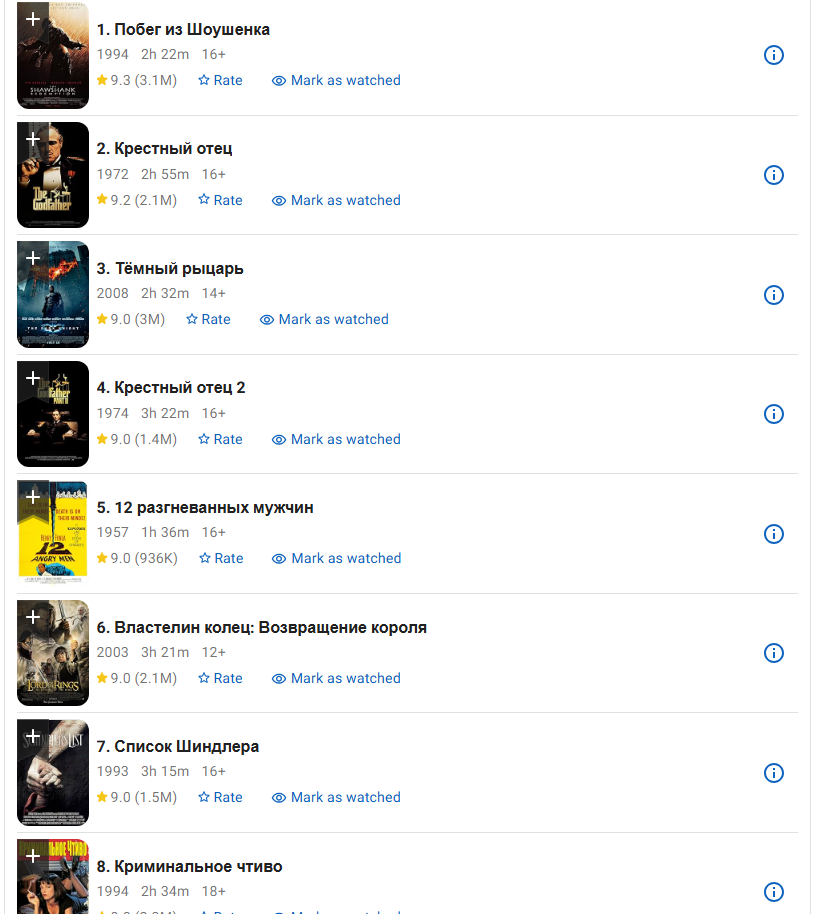

In [ ]:
# Посмотрим на топ-15 самых худших фильмов по Байесовскому среднему
movie_stats.sort_values('bayesian_avg', ascending=True).head(15)

,movieId,count,mean,bayesian_avg,title
3494,3593,4268,1.578,1.713,Battlefield Earth (2000)
4669,4775,669,1.126,1.880,Glitter (2001)
6464,6587,758,1.214,1.880,Gigli (2003)
11349,50798,1180,1.457,1.883,Epic Movie (2007)
9603,31698,633,1.232,1.969,Son of the Mask (2005)
1688,1760,2633,1.806,1.981,Spice World (1997)
6359,6482,1871,1.741,1.987,Dumb and Dumberer: When Harry Met Lloyd (2003)
1501,1556,5175,1.911,1.999,Speed 2: Cruise Control (1997)
12613,61348,557,1.206,2.011,Disaster Movie (2008)
1643,1707,3029,1.871,2.018,Home Alone 3 (1997)


# Немного про жанры

Почистим фильмы от:
* Года, который написан в конце строки
* Жанры разделены символом "|", преобразуем это в список

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
# Получаем списки фильмов
movies.genres = movies.genres.apply(lambda x: x.split('|'))
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


Используем класс Counter из модуля collections для подсчёта самых частотных жанров

In [ ]:
from collections import Counter

# Два вложенных цикла, чтобы проходился внутри списков по каждому элементу
genre_freq = Counter(x for genres in movies.genres for x in genres)

# Альтернатива без вложенного цикла
# counter = Counter()
# for x in movies.genres:
#     for x in x:
#         counter[x] += 1

# Выводим общее количество жанров и самые частотные
print('Всего {} жанров'.format(len(genre_freq)), end='\n\n')
genre_freq

Всего 20 жанров



Counter({'Adventure': 4145,
         'Animation': 2929,
         'Children': 2935,
         'Comedy': 16870,
         'Fantasy': 2731,
         'Romance': 7719,
         'Drama': 25606,
         'Action': 7348,
         'Crime': 5319,
         'Thriller': 8654,
         'Horror': 5989,
         'Mystery': 2925,
         'Sci-Fi': 3595,
         'IMAX': 195,
         'Documentary': 5605,
         'War': 1874,
         'Musical': 1054,
         'Western': 1399,
         'Film-Noir': 353,
         '(no genres listed)': 5062})

In [ ]:
# Топ-5 популярных
genre_freq.most_common(5)

[('Drama', 25606),
 ('Comedy', 16870),
 ('Thriller', 8654),
 ('Romance', 7719),
 ('Action', 7348)]

In [ ]:
# Соберём частоты в датафрейм и визуализируем
genre_freq_df = pd.DataFrame([genre_freq])

# Транспонируем, т.к. сейчас 20 колонок и 1 строка
print(genre_freq_df.shape)

# Выводим фрейм
transp_genres = genre_freq_df.T.reset_index()
transp_genres.columns = ['genre', 'freq']
transp_genres.head()

(1, 20)


,genre,freq
0,Adventure,4145
1,Animation,2929
2,Children,2935
3,Comedy,16870
4,Fantasy,2731


/tmp/ipython-input-36-1469737334.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0.5, 1.0, 'Частотность жанров среди фильмов')

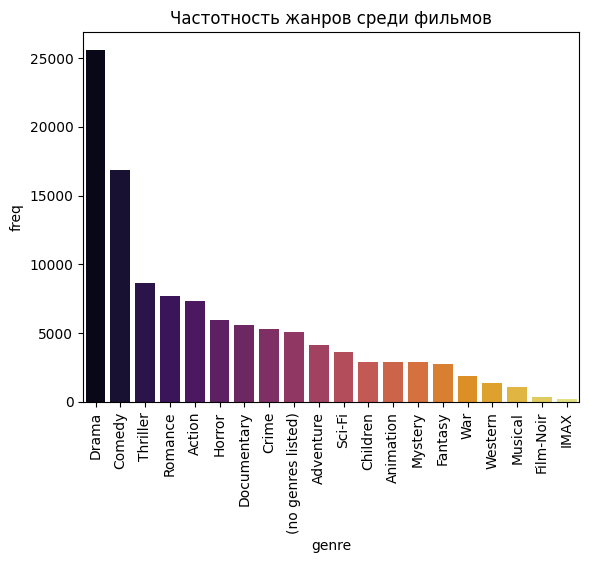

In [ ]:
# Визуализируем столбчатую диаграмму
sns.barplot(
    x='genre',
    y='freq',
    data=transp_genres.sort_values(by='freq', ascending=False),
    palette='inferno',
    )
plt.xticks(rotation=90)
plt.title('Частотность жанров среди фильмов')

# Коллаборативная фильтрация

Для того, чтобы создать рекомендательную систему обратимся с коллаборативной фильтрации. Для этого нам необходимо создать *user-item matrix*. Ряды - это пользователи, колонки - это фильмы. Основа коллаборативной фильтрации заключается в предсказаннии предпочтений пользователей на основе предпочтней похожих пользователей.

In [ ]:
# Для начала нам нужна разреженная матрица
# Напишем функцию, чтобы её сгенерировать
from scipy.sparse import csr_matrix

def sparse_matrix(df):
    '''
    Создаёт разреженную матрицу из датафрейма

    Аргументы:
        - dataframe,содержащий три колонки: movieId, userId, rating

    Возвращает:
        - разреженная матрица X
        - user_mapper: словарь, который переносит id пользователя к индекскам
        - user_inv_mapper: словарь, работающий в обратную сторону
        - movie_mapper: словарь, который переносить id фильма к индексам
        - movie_inv_mapper: словарь, работающий в обратную сторону
    '''
    M = df['userId'].nunique()
    N = df['movieId'].nunique()

    user_mapper = dict(zip(np.unique(df['userId']), list(range(M))))
    movie_mapper = dict(zip(np.unique(df['movieId']), list(range(N))))

    user_inv_mapper = dict(zip(list(range(M)), np.unique(df['userId'])))
    movie_inv_mapper = dict(zip(list(range(N)), np.unique(df['movieId'])))

    user_index = [user_mapper[i] for i in df['userId']]
    item_index = [movie_mapper[i] for i in df['movieId']]

    X = csr_matrix((df['rating'], (user_index, item_index)),shape=(M, N))

    return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = sparse_matrix(ratings)

In [ ]:
X.shape  # 162541 пользователь и 59047 фильмов

(162541, 59047)

## Оцениваем разреженность (заполненность)

In [ ]:
# Делим кол-во хранящихся элементов на общее кол-во
n_total = X.size
n_ratings = X.nnz
sparsity = n_ratings / n_total
print('Заполненность матрицы составляет {}%'.format(int(sparsity * 100)))

Заполненность матрицы составляет 100%


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


In [ ]:
# Активные VS Пассивные пользователи
n_rate_per_user = X.getnnz(axis=1)

print('Самые активные пользователи оцениили {} фильма.'.format(
    n_rate_per_user.max()
))
print('Самые пассивные пользователи оценили {} фильмов.'.format(
    n_rate_per_user.min()
))

Самые активные пользователи оцениили 32202 фильма.
Самые пассивные пользователи оценили 20 фильмов.


In [ ]:
# Активность по фильмам
n_rate_per_movie = X.getnnz(axis=0)

print('Самые оцениваемые фильмы получили {} оценок.'.format(
    n_rate_per_movie.max()
))
print('Самые неоцениваемые фильмы получили {} оценку.'.format(
    n_rate_per_movie.min()
))

Самые оцениваемые фильмы получили 81491 оценок.
Самые неоцениваемые фильмы получили 1 оценку.


/tmp/ipython-input-43-3635230117.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(n_rate_per_user, shade=True)
/tmp/ipython-input-43-3635230117.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(n_rate_per_movie, shade=True)


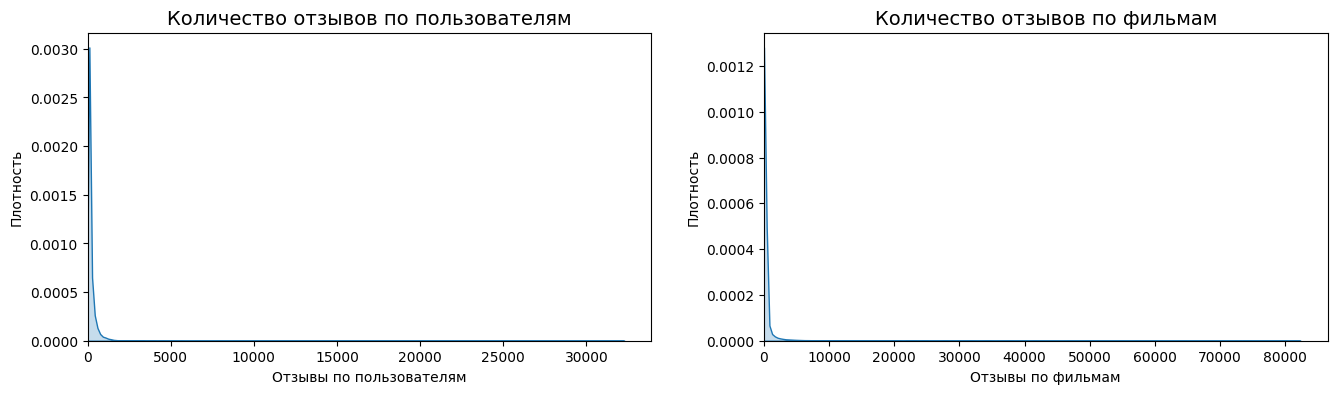

In [ ]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
sns.kdeplot(n_rate_per_user, shade=True)
plt.xlim(0)
plt.title('Количество отзывов по пользователям', fontsize=14)
plt.xlabel('Отзывы по пользователям')
plt.ylabel('Плотность')

plt.subplot(1, 2, 2)
sns.kdeplot(n_rate_per_movie, shade=True)
plt.xlim(0)
plt.title('Количество отзывов по фильмам', fontsize=14)
plt.xlabel('Отзывы по фильмам')
plt.ylabel('Плотность')
plt.show()

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
def find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, k, metric='cosine'):
    '''
    Находит k-ближайших соседей для конкретного фильма.

    Аргументы:
        - movie_id: id интересующего фильма
        - X: user-item матрица
        - k: количество схожих фильмов для возврата
        - metric: метрика вычисления дистанции: cosine, euclidean, manhattan

    Возвращает:
        - список k-схожих фильмов к переданному по movie_id
    '''
    X = X.T
    neighbour_ids = []

    movie_ind = movie_mapper[movie_id]
    movie_vec = X[movie_ind]
    if isinstance(movie_vec, (np.ndarray)):
        movie_vec = movie_vec.reshape(1,-1)

    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(movie_vec, return_distance=False)

    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(movie_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

In [ ]:
# ID схожих фильмов для фильма с ID == 1
similar_movies = find_similar_movies(1, X, movie_mapper, movie_inv_mapper, k=10)
similar_movies

[np.int64(260),
 np.int64(3114),
 np.int64(1270),
 np.int64(356),
 np.int64(480),
 np.int64(1210),
 np.int64(780),
 np.int64(364),
 np.int64(588)]

In [ ]:
# Собираем словарь по ID и названиям
movie_titles = dict(zip(movies['movieId'], movies['title']))
movie_id = 10

similar_movies = find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, metric='manhattan', k=10)
movie_title = movie_titles[movie_id]

# Выводим 10 похожих фильмов для фильма GoldenEye (пример)
print(f"На основе того, что вы смотрели {movie_title}:")
for i in similar_movies:
    print(movie_titles[i])

На основе того, что вы смотрели GoldenEye (1995):
Cliffhanger (1993)
Tomorrow Never Dies (1997)
World Is Not Enough, The (1999)
Batman Forever (1995)
Under Siege 2: Dark Territory (1995)
Waterworld (1995)
Judge Dredd (1995)
Beverly Hills Cop III (1994)
Licence to Kill (1989)


Ячейка выше показывает один из самых простых способов оценки рекомендательных моделей: посмотреть на логику рекомендованных фильмов, протестировав на нескольких, и мы действительно увидим, что если пользователь смотрел Джеймса Бонда "Золотой глаз", ему явно понравятся другие части или похожие, например, Бэтмен, Судья Дредд, Полицейский из Бэверли-Хиллз. Однако есть и другие способы проверить, насколько точны наши рекомендации. Но для начала закончим рекомендации по пользователю.

In [ ]:
# Реализуем функцию для пользователей
def recommend_for_user(user_id, user_item, user_mapper, movie_mapper, movie_inv_mapper, k_similar=10, n_recommendations=10, threshold=3.5):

    # Получаем индекс пользователя
    user_idx = user_mapper.get(user_id)
    if user_idx is None:
        return []  # Пользователь не найден

    # Извлекаем рейтинги пользователя
    user_ratings = user_item[user_idx].toarray().flatten()

    # Собираем понравившиеся фильмы (рейтинг >= порога)
    liked_movies = [
        movie_inv_mapper[i]
        for i, rating in enumerate(user_ratings)
        if rating >= threshold
    ]

    # Собираем все просмотренные фильмы (для исключения)
    seen_movies = set(
        movie_inv_mapper[i]
        for i, rating in enumerate(user_ratings)
        if rating > 0
    )

    # Для каждого понравившегося фильма находим похожие
    recommendations = {}
    for movie_id in liked_movies:
        similar_movies = find_similar_movies(
            movie_id,
            user_item,
            movie_mapper,
            movie_inv_mapper,
            k=k_similar
        )
        for sm_id in similar_movies:
            if sm_id not in seen_movies:
                recommendations[sm_id] = recommendations.get(sm_id, 0) + 1

    # Ранжируем по частоте упоминаний
    sorted_recs = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)
    return [movie_id for movie_id, _ in sorted_recs[:n_recommendations]]

In [ ]:
# Собираем id в список
rec_movies_ids = recommend_for_user(11, X, user_mapper, movie_mapper, movie_inv_mapper, k_similar=20, n_recommendations=20, threshold=4)

In [ ]:
# Выводим в виде названий
movie_titles = dict(zip(movies['movieId'], movies['title']))
movie_title = movie_titles[movie_id]

for i in a:
    print(movie_titles[i])

Matrix, The (1999)
Star Wars: Episode IV - A New Hope (1977)
Star Wars: Episode V - The Empire Strikes Back (1980)
Fight Club (1999)
Shawshank Redemption, The (1994)
Forrest Gump (1994)
Pulp Fiction (1994)
Usual Suspects, The (1995)
Braveheart (1995)
Godfather, The (1972)
Jurassic Park (1993)
Seven (a.k.a. Se7en) (1995)
Terminator 2: Judgment Day (1991)
Fugitive, The (1993)
Apollo 13 (1995)
Fargo (1996)
Lord of the Rings: The Two Towers, The (2002)
Pirates of the Caribbean: The Curse of the Black Pearl (2003)
Shrek (2001)
Gladiator (2000)
